In [88]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import sample

In [111]:
conn = sql.connect('books.db')
basic_df = pd.read_sql('SELECT * FROM basic_info', conn)
basic_df.drop_duplicates(inplace=True)

In [112]:
conn = sql.connect('books.db')
extra_df = pd.read_sql('SELECT * FROM extra_info', conn)

extra_df.drop('Unnamed: 0', axis=1, inplace=True)
extra_df.drop('Unnamed: 0.1', axis=1, inplace=True)
extra_df.drop('index', axis=1, inplace=True)

# remove newlines and tabs
extra_df = extra_df.replace('\n','', regex=True)
extra_df = extra_df.replace('\t','', regex=True)
extra_df.drop_duplicates(inplace=True)

In [113]:
df_two = pd.merge(extra_df, basic_df,on='book_link')
df = df_two[['title','categories','description']]
df = df[~(df.description == '')]

### Cleaning the categories

In [114]:
df.categories.replace('This book can be found in:', '', regex=True,inplace=True)
df.categories.replace('This product can be found in:', '', regex=True, inplace=True)
df['categories'] = df.categories.str.split('>').str[0]  ## get the root category
df['categories'] = df['categories'].str.replace("'", "")

In [115]:
fiction = ['Poetry, Drama & Criticism ','Fiction ','Graphic Novels & Manga ','Science Fiction, Fantasy & Horror ','Romantic Fiction ','Crime, Thrillers & Mystery ']

In [116]:
non = ['Spirituality & Beliefs ', 'Politics, Society & Education ', 'Business, Finance & Law ', 'Science, Technology & Medicine ','History ','Biography & True Stories ']

In [117]:
fiction_df = df[df.categories.isin(fiction)]
non_df = df[df.categories.isin(non)].sample(n=22563, random_state=1)
df = pd.concat([fiction_df, non_df])
df.categories = df.categories.astype('category') 

In [122]:
df = df.sort_index()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45126 entries, 8 to 464637
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        45126 non-null  object  
 1   categories   45126 non-null  category
 2   description  45126 non-null  object  
 3   fiction      45126 non-null  bool    
dtypes: bool(1), category(1), object(2)
memory usage: 1.1+ MB


In [120]:
df['fiction'] = df.categories.isin(fiction)
df['fiction'].value_counts()

False    22563
True     22563
Name: fiction, dtype: int64

In [128]:
df

,index,title,categories,description,fiction
0,8,Optical Studies in Liquids and Solids,"Science, Technology & Medicine",The study of the vibrations of polyatomic mole...,False
1,24,Economics with Connect Plus Card,"Business, Finance & Law",The combination of David Begg with new co-auth...,False
2,38,"Scoring High on SAT, Teacher Edition Grade 6","Politics, Society & Education",Teacher Edition,False
3,53,Teaching Anticorruption,"Business, Finance & Law",The movement in management education towards a...,False
4,58,Learning Organizations,"Business, Finance & Law",Learning Organizations: Turning Knowledge into...,False
...,...,...,...,...,...
45121,464556,Whio,"Science, Technology & Medicine","The blue duck, or whio, is one of New Zealand'...",False
45122,464559,Northern Irish Poetry,"Poetry, Drama & Criticism",Through discussion of the ways in which major ...,True
45123,464569,"Reviews of Physiology, Biochemistry and Pharma...","Science, Technology & Medicine",W. Ulbricht: Effects of veratridine on sodium ...,False
45124,464618,The Vital Needs Of The Dead By Igor Sakhnovsky,Fiction,The Vital Needs of the Dead is a tender coming...,True


In [ ]:
df = df.reset_index()
df.drop(columns='index',inplace=True)

In [132]:
df

,title,categories,description,fiction
0,Optical Studies in Liquids and Solids,"Science, Technology & Medicine",The study of the vibrations of polyatomic mole...,False
1,Economics with Connect Plus Card,"Business, Finance & Law",The combination of David Begg with new co-auth...,False
2,"Scoring High on SAT, Teacher Edition Grade 6","Politics, Society & Education",Teacher Edition,False
3,Teaching Anticorruption,"Business, Finance & Law",The movement in management education towards a...,False
4,Learning Organizations,"Business, Finance & Law",Learning Organizations: Turning Knowledge into...,False
...,...,...,...,...
45121,Whio,"Science, Technology & Medicine","The blue duck, or whio, is one of New Zealand'...",False
45122,Northern Irish Poetry,"Poetry, Drama & Criticism",Through discussion of the ways in which major ...,True
45123,"Reviews of Physiology, Biochemistry and Pharma...","Science, Technology & Medicine",W. Ulbricht: Effects of veratridine on sodium ...,False
45124,The Vital Needs Of The Dead By Igor Sakhnovsky,Fiction,The Vital Needs of the Dead is a tender coming...,True


In [133]:
df.to_pickle('class_data.pkl')

([<matplotlib.patches.Wedge at 0x21316c85c70>,
 [Text(6.735557395310444e-17, 1.1, 'non_fiction'),
  Text(-2.0206672185931328e-16, -1.1, 'ficiton')])

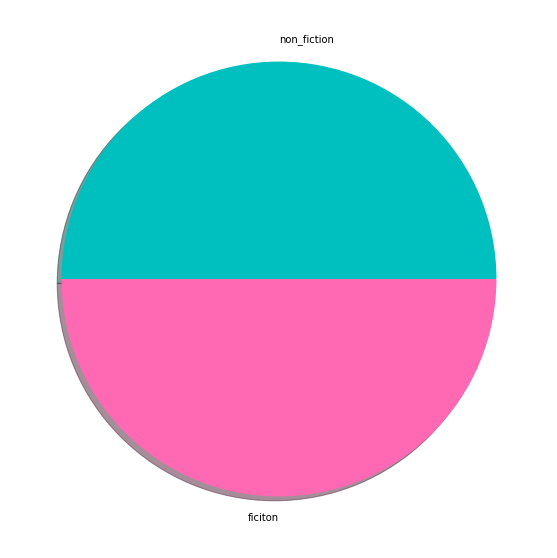

In [134]:
data = df['fiction'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(data,labels=['non_fiction','ficiton'],colors=['c','hotpink'], shadow=True)